In [3]:
from schrodinger import Schrodinger2D, Rectangle
import sys
sys.path.append('..')
import ugent

def V(x, y):
    return x*x + y*y

problem = Schrodinger2D(V, Rectangle(-10, 10, -10, 10), gridSize=[48,48], maxBasisSize=32)
problem.eigenvalues(50)

[1.9999999999995908,
 3.9999999999999654,
 4.000000000000007,
 5.99999999999983,
 6.0000000000000115,
 6.000000000000092,
 7.999999999999695,
 7.99999999999995,
 8.000000000000142,
 8.00000000000015,
 9.999999999999698,
 9.99999999999984,
 10.000000000000119,
 10.000000000000343,
 10.000000000000576,
 11.999999999999641,
 11.999999999999924,
 11.999999999999924,
 12.000000000000007,
 12.000000000000076]

In [49]:
from tqdm import tqdm
from time import sleep

for i in tqdm(range(20)):
    sleep(0.1)

100%|██████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.77it/s]


In [51]:
from pqdm.threads import pqdm
from tqdm import tqdm

harmonic = {
    "args": [lambda x, y: x*x+y*y, Rectangle(-8,8, -8,8)],
    "exact": sum(([2*i]*i for i in range(1, 30)), [])[:50]
}

def validate(gridSize, maxBasisSize, problem):
    s = Schrodinger2D(*problem["args"], gridSize=gridSize, maxBasisSize=maxBasisSize)
    exact = problem["exact"]
    eigs = s.eigenvalues(len(exact))
    return eigs, [abs(a-e) for a, e in zip(eigs, exact)]

to_validate = [
    ((grid, grid), N, harmonic) for N in [16, 24, 32] for grid in [32, 48, 64]
][::-1]

results = pqdm(to_validate, validate, n_jobs=8, argument_type="args", tqdm_class=tqdm)

QUEUEING TASKS | : 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2262.30it/s]
PROCESSING TASKS | : 100%|███████████████████████████████████████████████████████| 9/9 [01:51<00:00, 12.35s/it]
COLLECTING RESULTS | : 100%|██████████████████████████████████████████████████| 9/9 [00:00<00:00, 47965.36it/s]


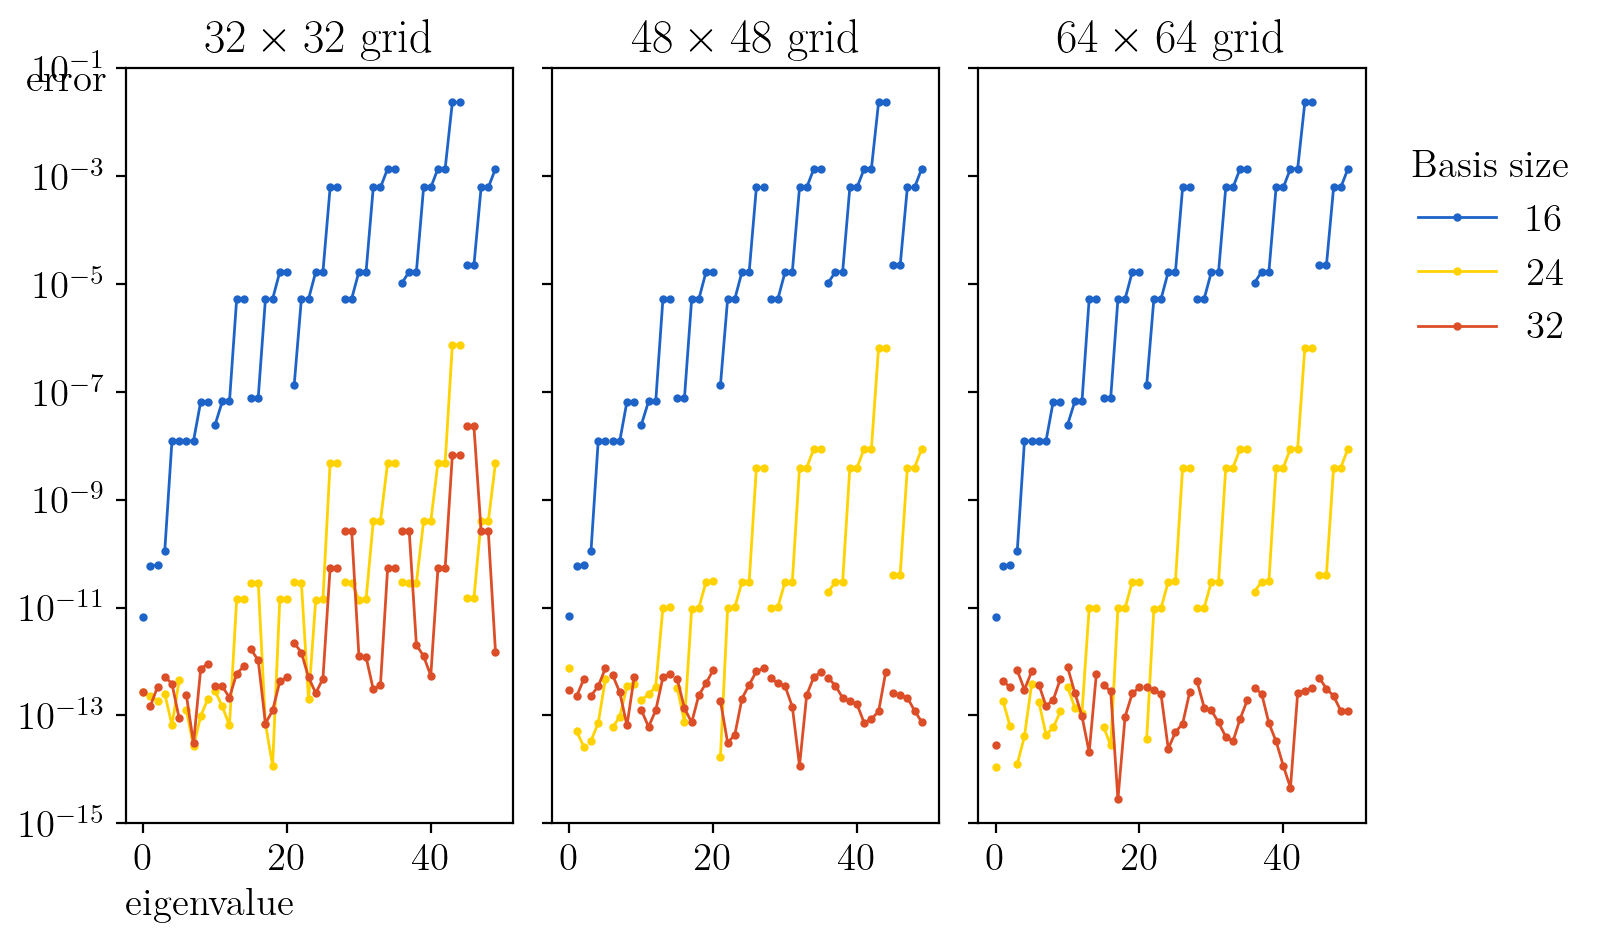

In [54]:
by_grid = {g: {} for g, _, _ in to_validate}

for (g, N, p), (eigs, errors) in zip(to_validate, results):
    by_grid[g][N] = errors

Es = range(len(to_validate[0][2]["exact"]))

colors = [ugent.blauw, ugent.geel, ugent.rood]

fig, axes = plt.subplots(1, 3, figsize=(8, 5), dpi=200, sharey=True, gridspec_kw=dict(wspace=0.1))
for i, (g, rest) in enumerate(sorted(by_grid.items())):
    ax = axes[i]
    ax.set_title(f"${g[0]}\\times{g[1]}$ grid")
    ax.set_ylim(1e-15, 1e-1)
    for color, (N, errors) in zip(colors, sorted(rest.items())):
        i = 1
        k = 0
        while k < len(errors):
            kwargs = dict()
            if i == 1:
                kwargs['label'] = f"${N}$"
            ax.semilogy(Es[k: k+i], [e+1e-15 for e in errors[k:k+i]], '.', ls='-', lw=1, markersize=4, **kwargs, color=color)
            k += i
            i += 1

axes[0].set_ylabel("error", rotation=0)
axes[0].yaxis.set_label_coords(-0.15,.96)
axes[0].set_xlabel("eigenvalue", loc="left")
fig.legend(*axes[0].get_legend_handles_labels(), loc="right", frameon=False, bbox_to_anchor=(1.05,.7), title="$\\text{Basis size}$")
plt.savefig("new_method_harmonic_errors.pdf", bbox_inches="tight")

In [1]:
validate((48,48,32),harmonic)

NameError: name 'validate' is not defined

In [7]:
problem = Schrodinger2D(V, Rectangle(-10, 10, -10, 10), gridSize=[48,48], maxBasisSize=20)
problem.eigenvalues(50)

[2.0000000000000804,
 3.9999999999999996,
 4.00000000000015,
 6.000000000000268,
 6.000000000019291,
 6.000000000019291,
 8.000000000019234,
 8.000000000019318,
 8.000000000129559,
 8.000000000129607,
 10.000000000038463,
 10.000000000129651,
 10.000000000129695,
 10.000000014372144,
 10.00000001437219,
 12.000000000148763,
 12.000000000148914,
 12.0000000143722,
 12.00000001437223,
 12.000000057412116,
 12.000000057412134,
 14.000000000259295,
 14.00000001439139,
 14.000000014391516,
 14.000000057412196,
 14.000000057412267,
 14.000003238208471,
 14.000003238208475,
 16.000000014501808,
 16.000000014501907,
 16.00000005743131,
 16.00000005743141,
 16.00000323820849,
 16.000003238208507,
 16.000009121882186,
 16.000009121882254,
 18.000000028744402,
 18.000000057541783,
 18.000000057541815,
 18.000003238227713,
 18.00000323822782,
 18.000009121882268,
 18.00000912188243,
 18.000279818170988,
 18.000279818171034,
 20.000000071784367,
 20.00000007178438,
 20.00000323833808,
 20.000003238